In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(194673, 38)

In [4]:
df_bp = df[['INCDATE','SEVERITYCODE']]
df_bp['INCDATE'] = pd.to_datetime(df_bp['INCDATE'])
df_bp['YEAR']=df_bp['INCDATE'].dt.year
df_bp['YEAR'] = df_bp['YEAR'].astype(str).replace('\.0', '', regex=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [5]:
df_bp.drop(['INCDATE'],axis=1,inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


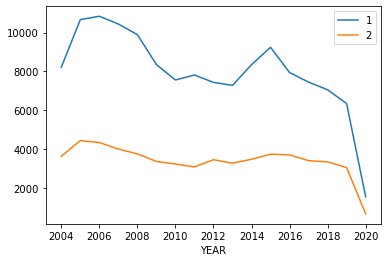

In [6]:
ctdf = df_bp.reset_index().groupby(['YEAR','SEVERITYCODE'], as_index=False).count().rename(columns={'index':'COUNT'})

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

for key, data in ctdf.groupby('SEVERITYCODE'):
    data.plot(x='YEAR', y='COUNT', ax=ax, label=key)

In [7]:
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [8]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [9]:
df.shape

(194673, 38)

In [10]:
df1 = df
df1.drop(['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING'],axis=1,inplace=True)

In [11]:
df1.drop(['SEVERITYDESC','INCDTTM', 'SDOT_COLDESC', 'ST_COLDESC','SEVERITYCODE.1'],axis=1, inplace = True)

In [12]:
df1.drop(['X', 'Y','LOCATION', 'SDOT_COLCODE', 'ST_COLCODE','INCDATE'],axis=1,inplace=True)

In [13]:
df1.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEGLANEKEY', 'CROSSWALKKEY'],axis=1, inplace = True)

In [14]:
df1.shape

(194673, 14)

In [15]:
df1.groupby('UNDERINFL').size()

UNDERINFL
0     80394
1      3995
N    100274
Y      5126
dtype: int64

In [16]:
import numpy as np
df1['UNDERINFL'] = np.where(df1['UNDERINFL'] =='Y',1,df1['UNDERINFL'])
df1['UNDERINFL'] = np.where(df1['UNDERINFL'] =='N',0,df1['UNDERINFL'])
df1['UNDERINFL'] = pd.to_numeric(df1['UNDERINFL'])
df1.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0.0,Overcast,Wet,Daylight,N
1,1,Matched,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0.0,Raining,Wet,Dark - Street Lights On,N
2,1,Matched,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0.0,Overcast,Dry,Daylight,N
3,1,Matched,Block,Other,3,0,0,3,Mid-Block (not related to intersection),0.0,Clear,Dry,Daylight,N
4,2,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0.0,Raining,Wet,Daylight,N


In [17]:
df1['SEVERITYCODE'] = np.where(df1.SEVERITYCODE ==2,1,0)
df1['STATUS'] = np.where(df1.STATUS =='Matched',1,0)
df1['HITPARKEDCAR'] = np.where(df1.HITPARKEDCAR =='Y',1,0)

df_trans = df1
df_trans = pd.get_dummies(df_trans, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'])

In [18]:
df1 = df1.dropna()
df_trans = df_trans.dropna()

<AxesSubplot:>

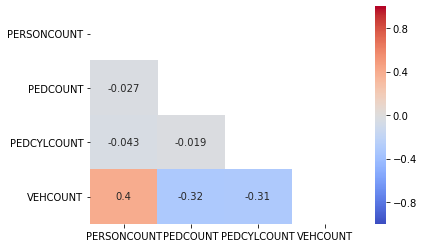

In [19]:
import seaborn as sns
df_cor = df1[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
matrix = np.triu(df_cor.corr())
sns.heatmap(df_cor.corr(),annot=True,cmap= 'coolwarm', vmin=-1, vmax=1, center= 0,mask=matrix)

F_onewayResult(statistic=3530.8078377494403, pvalue=0.0)

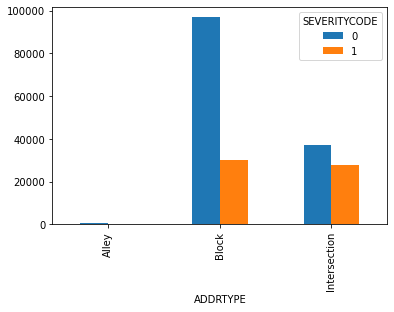

In [20]:
ax = df.groupby(['SEVERITYCODE','ADDRTYPE'])['ADDRTYPE'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['ADDRTYPE','SEVERITYCODE']]
grp_anova = df_anova.groupby('ADDRTYPE')
anova_result = stats.f_oneway(grp_anova.get_group("Intersection")["SEVERITYCODE"],
                              grp_anova.get_group("Block")["SEVERITYCODE"],
                              grp_anova.get_group("Alley")["SEVERITYCODE"])
anova_result

F_onewayResult(statistic=5369.001306448202, pvalue=0.0)

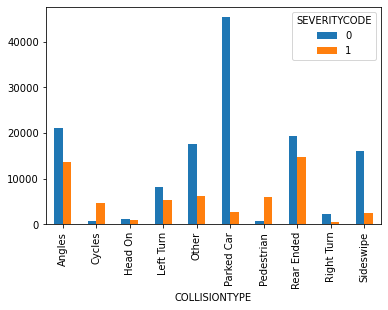

In [21]:
ax = df.groupby(['SEVERITYCODE','COLLISIONTYPE'])['COLLISIONTYPE'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['COLLISIONTYPE','SEVERITYCODE']]
grp_anova = df_anova.groupby('COLLISIONTYPE')
anova_result = stats.f_oneway(grp_anova.get_group("Angles")["SEVERITYCODE"],
                              grp_anova.get_group("Cycles")["SEVERITYCODE"],
                              grp_anova.get_group("Head On")["SEVERITYCODE"],
                              grp_anova.get_group("Left Turn")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Parked Car")["SEVERITYCODE"],
                              grp_anova.get_group("Pedestrian")["SEVERITYCODE"],
                              grp_anova.get_group("Rear Ended")["SEVERITYCODE"],
                              grp_anova.get_group("Right Turn")["SEVERITYCODE"],
                              grp_anova.get_group("Sideswipe")["SEVERITYCODE"])
anova_result

F_onewayResult(statistic=1403.6655189455819, pvalue=0.0)

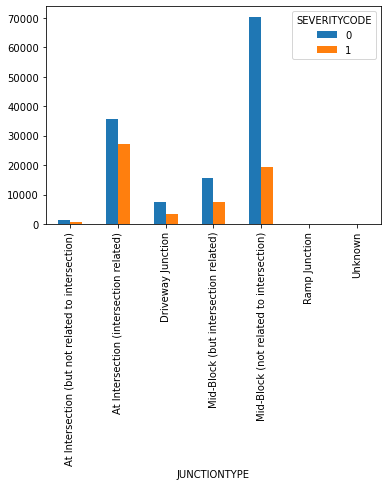

In [22]:
ax = df.groupby(['SEVERITYCODE','JUNCTIONTYPE'])['JUNCTIONTYPE'].count().unstack(0).plot.bar()

df_anova = df1[['JUNCTIONTYPE','SEVERITYCODE']]
grp_anova = df_anova.groupby('JUNCTIONTYPE')
anova_result = stats.f_oneway(grp_anova.get_group("At Intersection (but not related to intersection)")["SEVERITYCODE"],
                              grp_anova.get_group("At Intersection (intersection related)")["SEVERITYCODE"],
                              grp_anova.get_group("Driveway Junction")["SEVERITYCODE"],
                              grp_anova.get_group("Mid-Block (but intersection related)")["SEVERITYCODE"],
                              grp_anova.get_group("Mid-Block (not related to intersection)")["SEVERITYCODE"],
                              grp_anova.get_group("Ramp Junction")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"])
anova_result

F_onewayResult(statistic=374.0303665512938, pvalue=0.0)

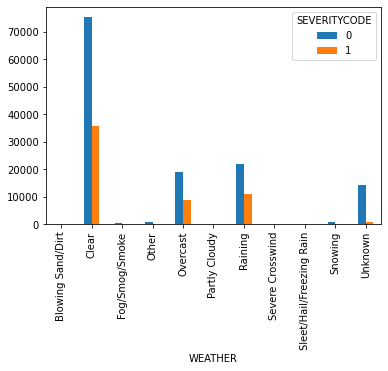

In [23]:
ax = df.groupby(['SEVERITYCODE','WEATHER'])['WEATHER'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['WEATHER','SEVERITYCODE']]
grp_anova = df_anova.groupby('WEATHER')
anova_result = stats.f_oneway(grp_anova.get_group("Blowing Sand/Dirt")["SEVERITYCODE"],
                              grp_anova.get_group("Clear")["SEVERITYCODE"],
                              grp_anova.get_group("Fog/Smog/Smoke")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Overcast")["SEVERITYCODE"],
                              grp_anova.get_group("Partly Cloudy")["SEVERITYCODE"],
                              grp_anova.get_group("Raining")["SEVERITYCODE"],
                              grp_anova.get_group("Severe Crosswind")["SEVERITYCODE"],
                              grp_anova.get_group("Sleet/Hail/Freezing Rain")["SEVERITYCODE"],
                              grp_anova.get_group("Snowing")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"])
anova_result


F_onewayResult(statistic=476.040939664256, pvalue=0.0)

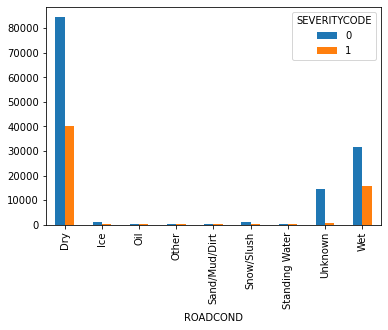

In [24]:
ax = df.groupby(['SEVERITYCODE','ROADCOND'])['ROADCOND'].count().unstack(0).plot.bar()

from scipy import stats
df_anova = df1[['ROADCOND','SEVERITYCODE']]
grp_anova = df_anova.groupby('ROADCOND')
anova_result = stats.f_oneway(grp_anova.get_group("Dry")["SEVERITYCODE"],
                              grp_anova.get_group("Ice")["SEVERITYCODE"],
                              grp_anova.get_group("Oil")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Sand/Mud/Dirt")["SEVERITYCODE"],
                              grp_anova.get_group("Snow/Slush")["SEVERITYCODE"],
                              grp_anova.get_group("Standing Water")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"],
                              grp_anova.get_group("Wet")["SEVERITYCODE"])
anova_result

In [25]:

from scipy import stats
df_anova = df1[['LIGHTCOND','SEVERITYCODE']]
grp_anova = df_anova.groupby('LIGHTCOND')
anova_result = stats.f_oneway(grp_anova.get_group("Dark - No Street Lights")["SEVERITYCODE"],
                              grp_anova.get_group("Dark - Street Lights Off")["SEVERITYCODE"],
                              grp_anova.get_group("Dark - Street Lights On")["SEVERITYCODE"],
                              grp_anova.get_group("Dark - Unknown Lighting")["SEVERITYCODE"],
                              grp_anova.get_group("Dawn")["SEVERITYCODE"],
                              grp_anova.get_group("Daylight")["SEVERITYCODE"],
                              grp_anova.get_group("Dusk")["SEVERITYCODE"],
                              grp_anova.get_group("Other")["SEVERITYCODE"],
                              grp_anova.get_group("Unknown")["SEVERITYCODE"])
anova_result

F_onewayResult(statistic=463.6530730759219, pvalue=0.0)

In [26]:
!pip install researchpy
import researchpy as rp
import scipy.stats as stats

i_th = ['Y']
i_th = i_th*57

results = rp.ttest(group1= df_trans['SEVERITYCODE'][df_trans.iloc[:,1] == 1], group1_name= "1",
                   group2= df_trans['SEVERITYCODE'][df_trans.iloc[:,1] == 0], group2_name= "0")
results[1].iloc[3,1]

     |████████████████████████████████| 9.5MB 5.7MB/s eta 0:00:01     |█████████                       | 2.6MB 5.7MB/s eta 0:00:02     |██████████████████████▎         | 6.6MB 5.7MB/s eta 0:00:01     |██████████████████████████▋     | 7.9MB 5.7MB/s eta 0:00:01
     |████████████████████████████████| 235kB 9.4MB/s eta 0:00:01


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


0.2555

In [27]:
i_th[1] = 'N'

for i in range (6,57):
    results = rp.ttest(group1= df_trans['SEVERITYCODE'][df_trans.iloc[:,i] == 1], group1_name= "1", 
                       group2= df_trans['SEVERITYCODE'][df_trans.iloc[:,i] == 0], group2_name= "0")
    if results[1].iloc[3,1] >= 0.05: i_th[i]= 'N'

In [28]:
keep = np.where(np.asarray(i_th)=='Y')
df_trans = df_trans.iloc[:,[0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 29, 31, 32, 34, 37, 38, 39, 40, 44, 46, 47, 48, 49, 52, 53, 54, 55, 56]]
df_trans.shape

(189789, 41)

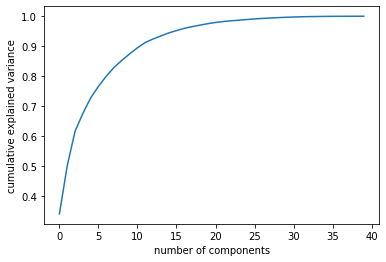

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_trans[df_trans.columns[1:42]])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [30]:
pca = PCA(n_components=3)
pca.fit(df_trans[df_trans.columns[1:42]])
print(pca.explained_variance_)

[1.91661579 0.89834652 0.64487807]


In [31]:
projected = pca.fit_transform(df_trans[df_trans.columns[1:42]])
print(df_trans[df_trans.columns[1:42]].shape)
print(projected.shape)

(189789, 40)
(189789, 3)


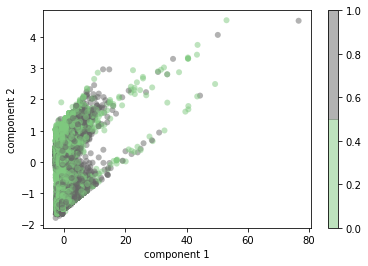

In [32]:
from matplotlib import cm
plt.scatter(projected[:, 0], projected[:, 1],
            c=df_trans['SEVERITYCODE'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [33]:
df_trans.reset_index(drop=True, inplace=True)
class_pca = df_trans['SEVERITYCODE']
df_pca = pd.concat([class_pca, round(pd.DataFrame(projected),3)], axis=1, ignore_index = False)
df_pca.shape

(189789, 4)

In [34]:
df_trans['SEVERITYCODE'].value_counts()

0    132630
1     57159
Name: SEVERITYCODE, dtype: int64

In [35]:
i_class0 = np.where(df_trans['SEVERITYCODE'] == 0)[0]
i_class1 = np.where(df_trans['SEVERITYCODE'] == 1)[0]

n_class0 = len(i_class0)
n_class1 = len(i_class1)


i_class1_upsampled = np.random.choice(i_class1, size=n_class0, replace=True)

df_upsampled = df_trans.iloc[i_class1_upsampled,].append(pd.DataFrame(data = df_trans.iloc[i_class0,]), ignore_index=True)

df_upsampled.shape

(265260, 41)

In [36]:
i_class0 = np.where(df_pca['SEVERITYCODE'] == 0)[0]
i_class1 = np.where(df_pca['SEVERITYCODE'] == 1)[0]

n_class0 = len(i_class0)
n_class1 = len(i_class1)


i_class1_downsampled = np.random.choice(i_class0, size=n_class1, replace=True)

df_downsampled = df_pca.iloc[i_class1_downsampled,].append(pd.DataFrame(data = df_pca.iloc[i_class1,]), ignore_index=True)

df_downsampled.shape

(114318, 4)

In [37]:
y = df_upsampled['SEVERITYCODE']
X = df_upsampled.drop(['SEVERITYCODE'],axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (212208, 40) (212208,)
Test set: (53052, 40) (53052,)


In [39]:
y_pca = df_downsampled['SEVERITYCODE']
X_pca = df_downsampled.drop(['SEVERITYCODE'],axis=1)

In [40]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = 0.2, random_state = 1234)
print ('PCA Train set:', X_train_pca.shape,  y_train_pca.shape)
print ('PCA Test set:', X_test_pca.shape,  y_test_pca.shape)

PCA Train set: (91454, 3) (91454,)
PCA Test set: (22864, 3) (22864,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [42]:
best_score = 0
for C in [0.0001,0.001,0.01,0.1,1,10,100,1000]:
        lr = LogisticRegression(C=C,solver='liblinear').fit(X_train,y_train)
        y_hat = lr.predict(X_train)
        score = f1_score(y_train, y_hat, average='weighted') 
        if score > best_score:
            best_score = score
            best_parameters = {'C':C}
            
print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Best score:0.70
Best parameters:{'C': 0.01}


In [43]:
lr = LogisticRegression(C=0.001,solver='liblinear').fit(X_train,y_train)
f1_score = cross_val_score(lr, X_train, y_train, cv=3, scoring = make_scorer(f1_score))
f1_score

array([0.72435956, 0.72452267, 0.7268931 ])

In [44]:
print("Logistic Regression Average Training F1-score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Logistic Regression Average Training F1-score: 0.73 (+/- 0.00)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): 
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train_pca,y_train_pca)
    yhat = kNN_model.predict(X_test_pca)
    mean_acc[n-1]=np.mean(yhat==y_test_pca);
    std_acc[n-1]=np.std(yhat==y_test_pca)/np.sqrt(yhat.shape[0])

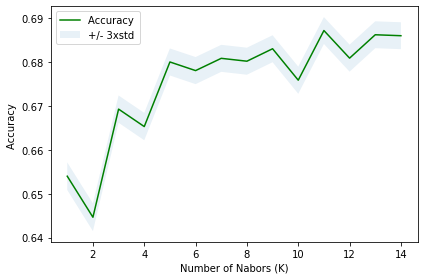

The best accuracy was with 0.6872375787263821 with k= 11


In [46]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [57]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train_pca,y_train_pca)

f1_score = cross_val_score(neigh, X_train_pca, y_train_pca, cv=3, scoring = make_scorer(f1_score))
f1_score

array([0.6824057 , 0.67662548, 0.6825614 ])

In [58]:
print("K Nearest Neighbor Average Training F1-score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

K Nearest Neighbor Average Training F1-score: 0.68 (+/- 0.01)


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), param_grid)

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_preds = np.where(tree_preds >=0.5,1,0)
tree_performance = f1_score(y_test, tree_preds)

tree.best_params_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 9}

In [76]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
Tree.fit(X_train,y_train)

f1_score = cross_val_score(lr, X_train, y_train, cv=3, scoring = make_scorer(f1_score))
f1_score

array([0.72435956, 0.72452267, 0.7268931 ])

In [77]:
print("Decision Tree Average Training F1-score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))

Decision Tree Average Training F1-score: 0.73 (+/- 0.00)


In [78]:
from sklearn.metrics import f1_score
y_LR = lr.predict(X_test)

print("Logistic Regression's Test F1-score ",f1_score(y_test, y_LR, average='weighted') )

Logistic Regression's Test F1-score  0.7024750994501149


In [72]:
y_DT = tree.predict(X_test)

print("Decision Tree's Test F1-score ",f1_score(y_test, y_DT, average='weighted') )

Decision Tree's Test F1-score  0.7054549177447814


In [75]:
from sklearn.metrics import f1_score

y_KNN = neigh.predict(X_test_pca)

print("KNN's Test set F1-score ",f1_score(y_test_pca, y_KNN, average='weighted') )

KNN's Test set F1-score  0.6860351922013241
